In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from app.active_config import cfg

2025-07-07 15:13:40.910877: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-07 15:13:40.949786: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 15:13:41.200462: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 15:13:41.440699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751890421.640947    5851 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751890421.69

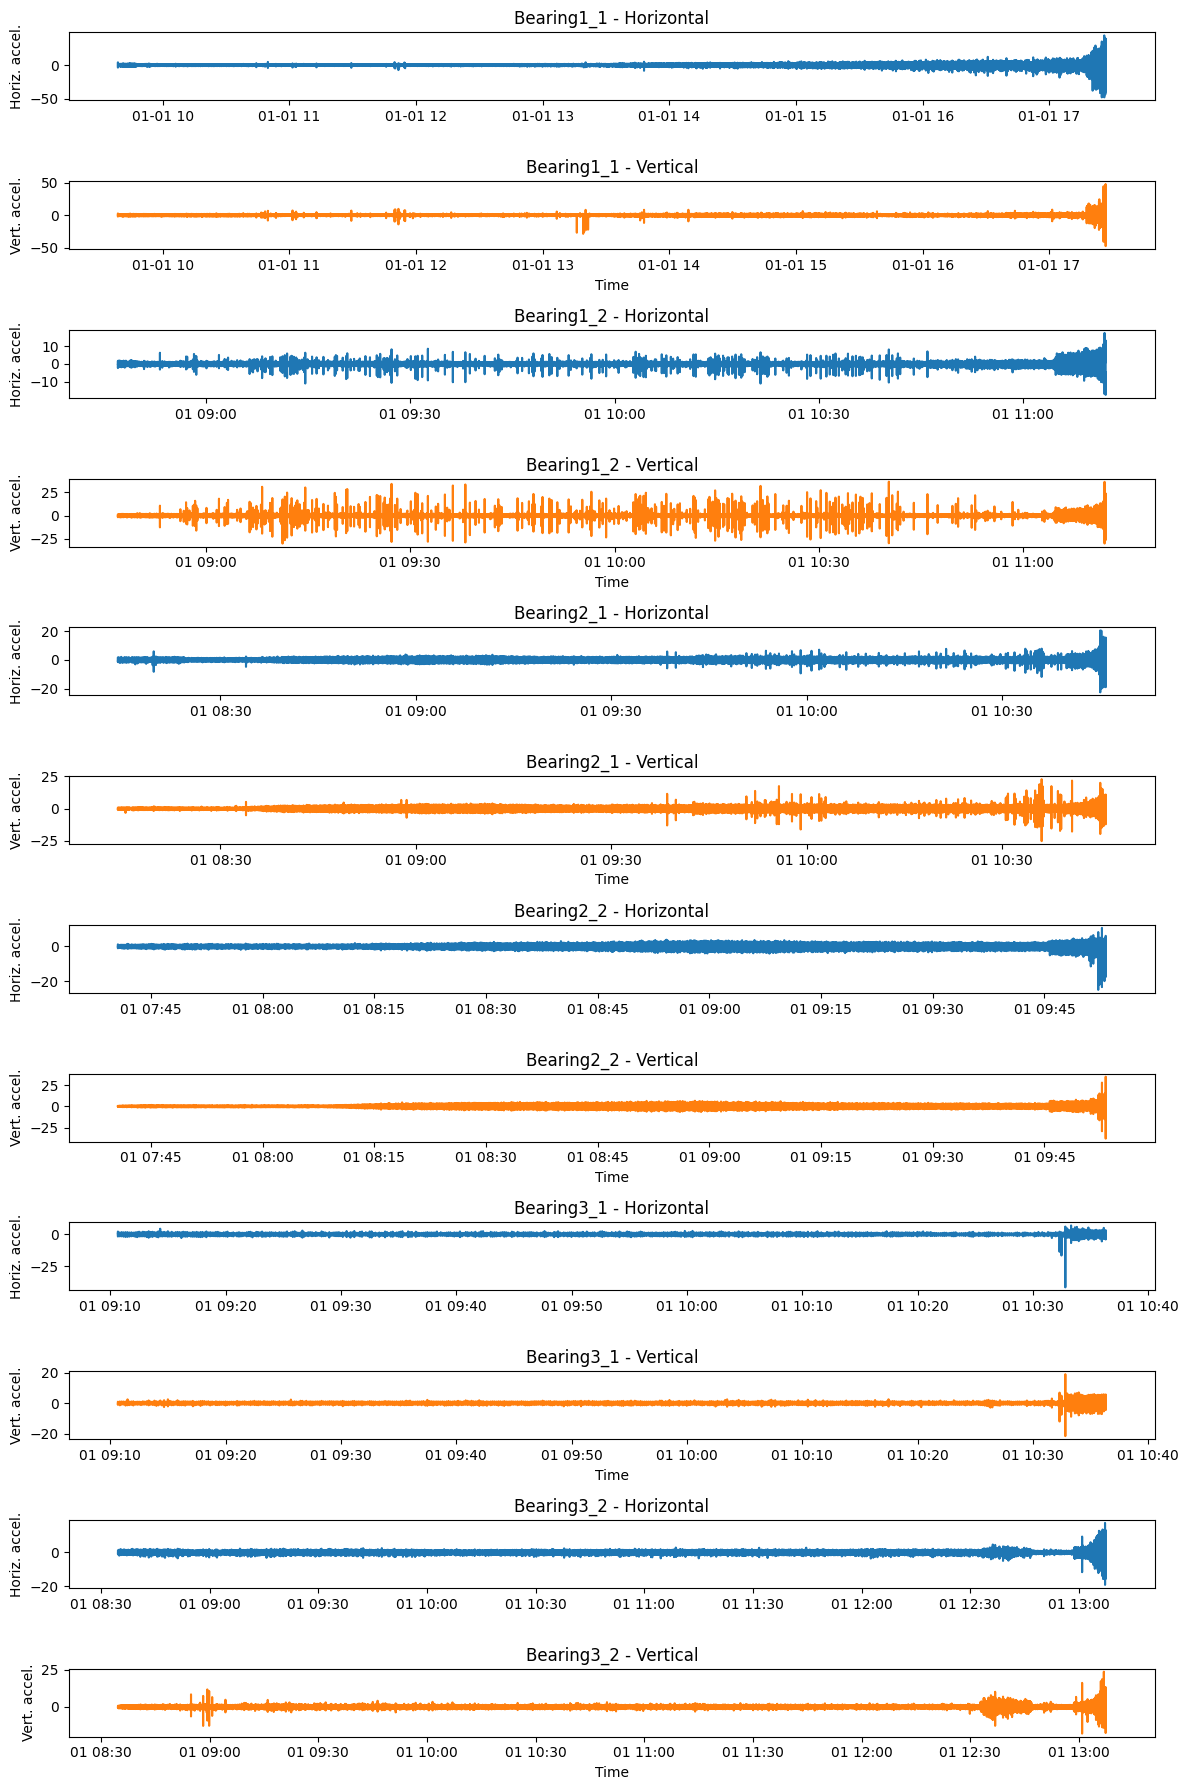

In [8]:
#### Plot the train files of the pronostia dataset!
files_path = cfg.PICKLE_TRAIN_DIR

# Count total number of files (excluding subdirectories)
num_files = sum(1 for f in files_path.iterdir() if f.is_file())

# Create figure: 2 subplots per file, stacked
fig, axs = plt.subplots(num_files * 2, 1, figsize=(12, 3*num_files), sharex=False)

if num_files == 0:
    print("No files found.")
else:
    for i, file_path in enumerate(files_path.rglob('*.pkl')):
        with file_path.open('rb') as f:
            df = pickle.load(f)

        # Top subplot for this file: Horizontal acceleration
        axs[i*2].plot(df['Time'], df['Horiz. accel.'], color='tab:blue')
        axs[i*2].set_ylabel('Horiz. accel.')
        axs[i*2].set_title(f"{file_path.name[:10]} - Horizontal")

        # Bottom subplot for this file: Vertical acceleration
        axs[i*2 + 1].plot(df['Time'], df['Vert. accel.'], color='tab:orange')
        axs[i*2 + 1].set_ylabel('Vert. accel.')
        axs[i*2 + 1].set_title(f"{file_path.name[:10]} - Vertical")
        axs[i*2 + 1].set_xlabel('Time')

    plt.tight_layout()
    plt.show()

In [10]:
#### Load one file and inspect!! #####

# Collect all .pkl files into a sorted list
pkl_files = sorted(files_path.rglob('*.pkl'))

# Print the total number and list of file names
print(f"Total .pkl files found: {len(pkl_files)}")
for idx, file in enumerate(pkl_files):
    print(f"{idx}: {file.name}")

# Choose the nth file
n = 0
if n < len(pkl_files):
    selected_file = pkl_files[n]
    with selected_file.open('rb') as f:
        data = pickle.load(f)
    print(f"\nLoaded file #{n}: {selected_file.name}")
else:
    print(f"Index {n} is out of range. Only {len(pkl_files)} files found.")

print(type(data))
print(data.head())
print(data.columns)

Total .pkl files found: 6
0: Bearing1_1_DF.pkl
1: Bearing1_2_DF.pkl
2: Bearing2_1_DF.pkl
3: Bearing2_2_DF.pkl
4: Bearing3_1_DF.pkl
5: Bearing3_2_DF.pkl

Loaded file #0: Bearing1_1_DF.pkl
<class 'pandas.core.frame.DataFrame'>
                        Time  Horiz. accel.  Vert. accel.
0 1900-01-01 09:39:39.656640          0.552        -0.146
1 1900-01-01 09:39:39.657030          0.501        -0.480
2 1900-01-01 09:39:39.657420          0.138         0.435
3 1900-01-01 09:39:39.657810         -0.423         0.240
4 1900-01-01 09:39:39.658200         -0.802         0.020
Index(['Time', 'Horiz. accel.', 'Vert. accel.'], dtype='object')


In [11]:
############## Plot raw signals of a single bearing!!!!#############
def plot_signals(df, title=None):
    fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
    axs[0].plot(df['Time'], df['Horiz. accel.'], color='tab:blue')
    axs[0].set_ylabel('Horizontal Accel.')
    axs[0].set_title(title or 'Horizontal and Vertical Acceleration vs Time')
    axs[1].plot(df['Time'], df['Vert. accel.'], color='tab:orange')
    axs[1].set_ylabel('Vertical Accel.')
    axs[1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

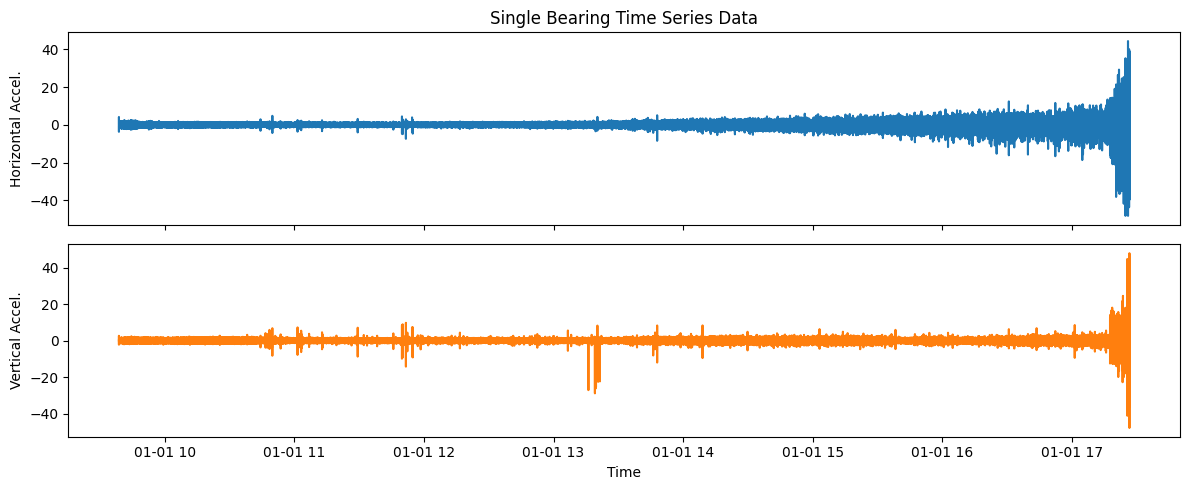

In [12]:
###### Plot raw signals from the first file ######
plot_signals(data, title='Single Bearing Time Series Data')

In [13]:
# Path to folder containing mel spectrogram .npy files!
mel_folder = cfg.FEATURE_DIR 

# List all .npy files
mel_files = sorted([f for f in os.listdir(mel_folder) if f.endswith('.npy')])

print(f"Found {len(mel_files)} mel spectrogram files.")

Found 17 mel spectrogram files.


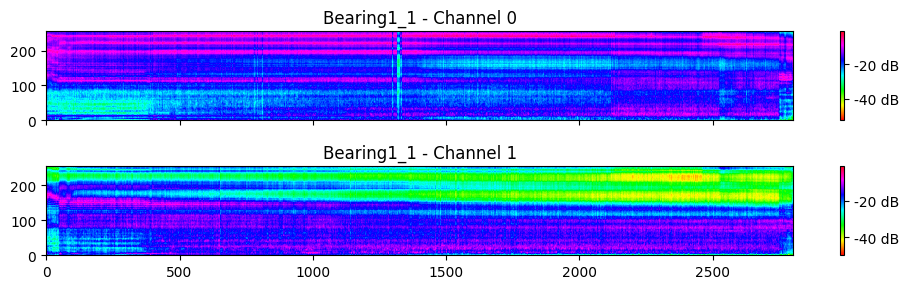

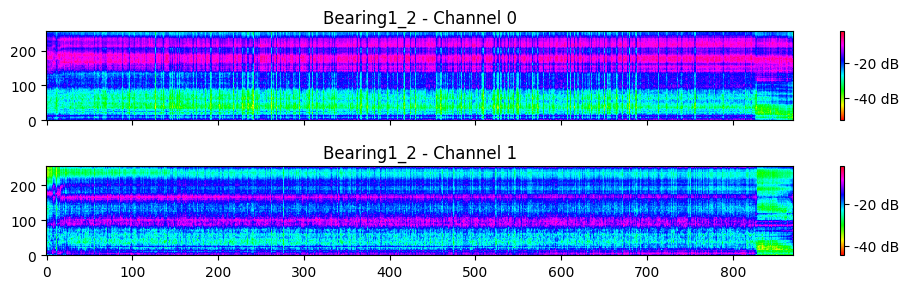

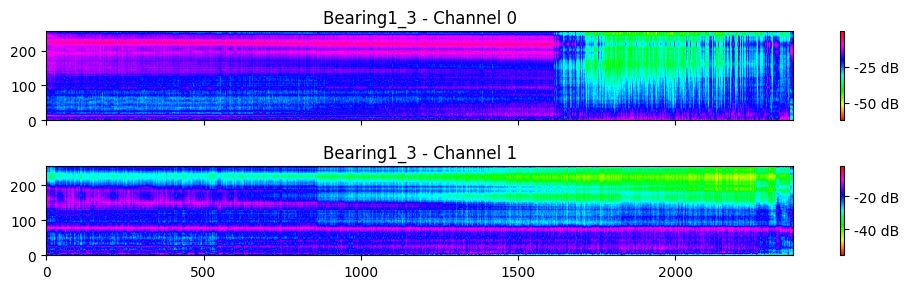

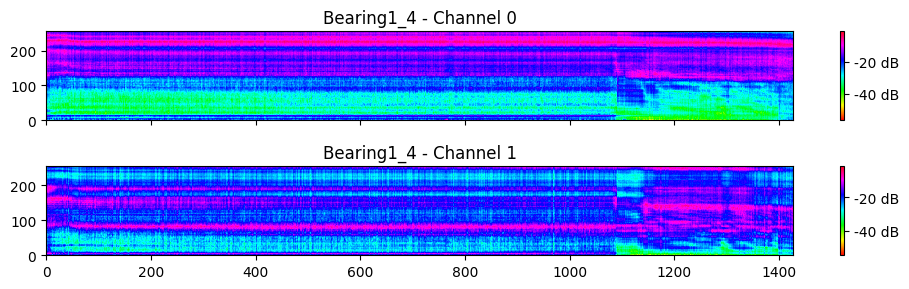

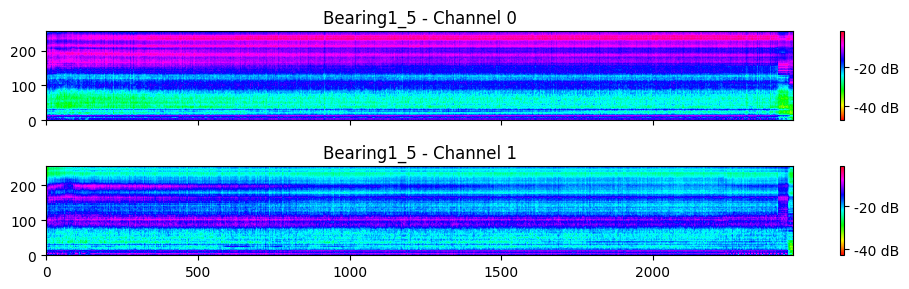

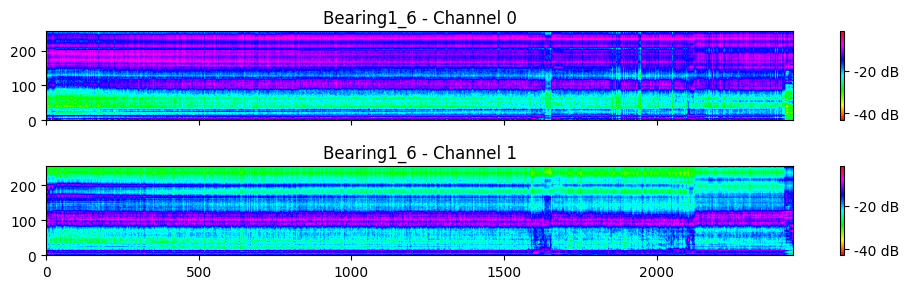

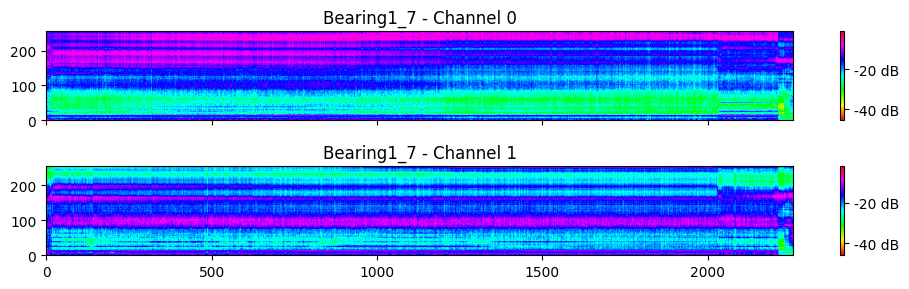

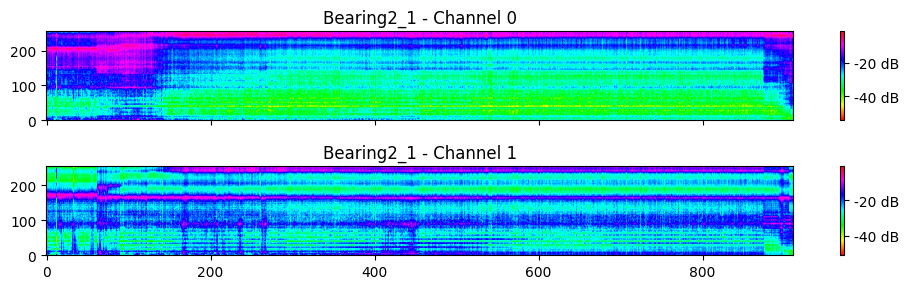

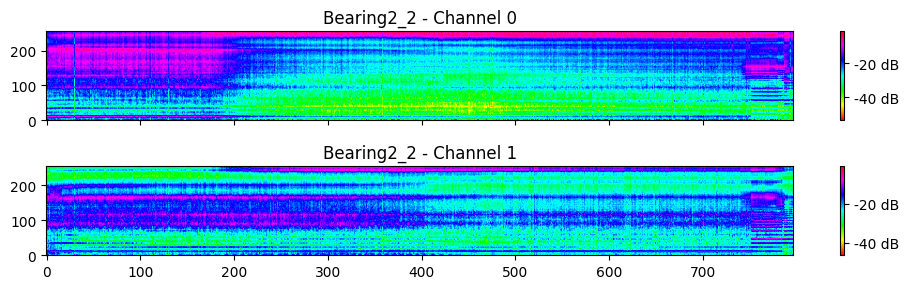

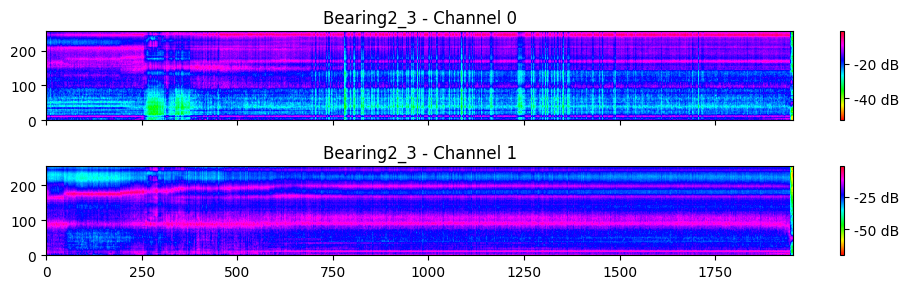

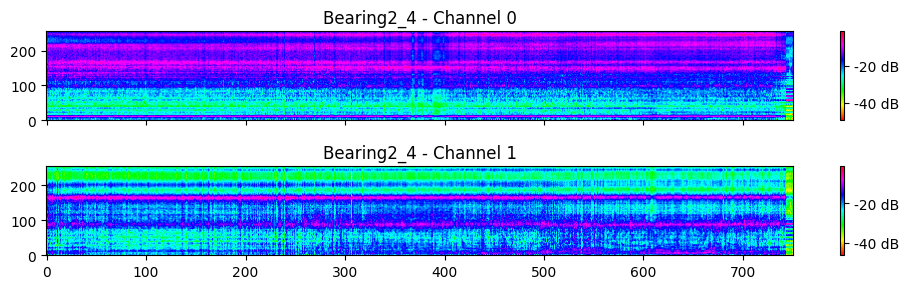

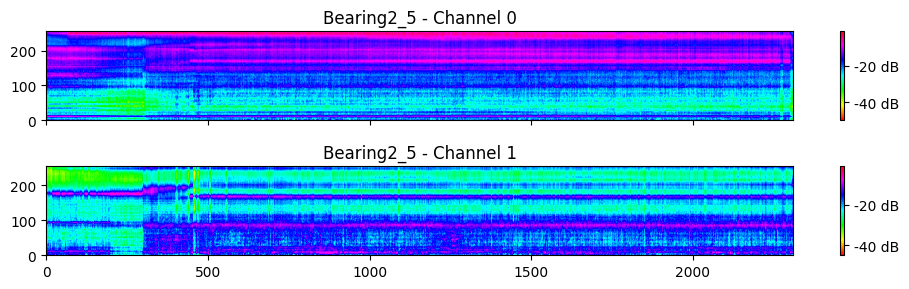

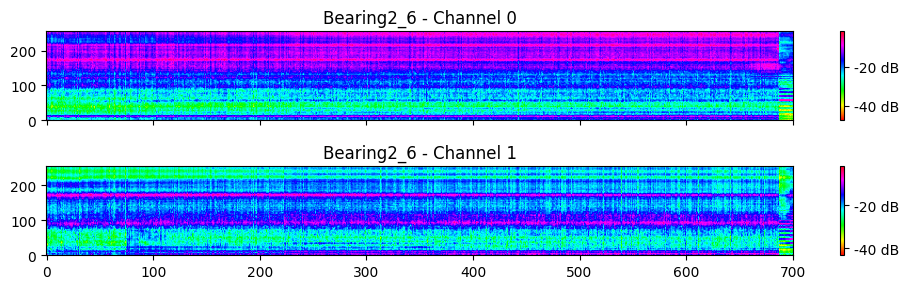

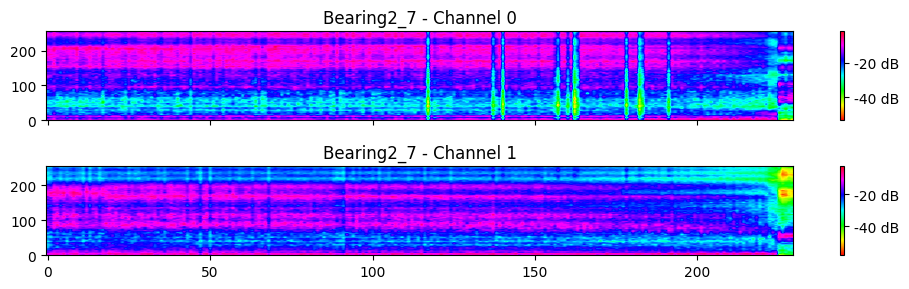

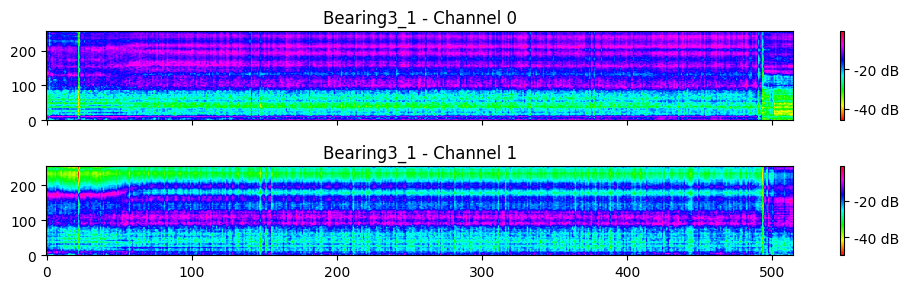

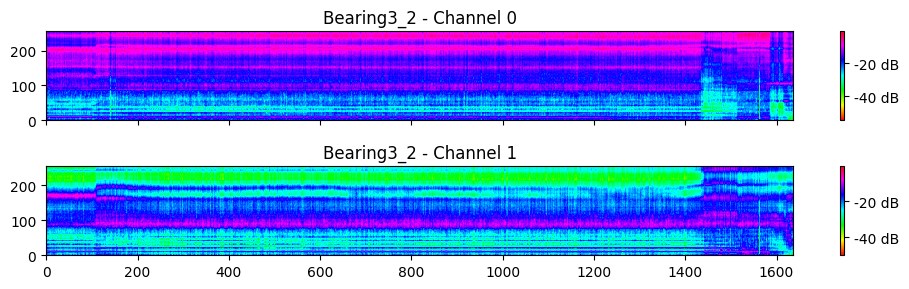

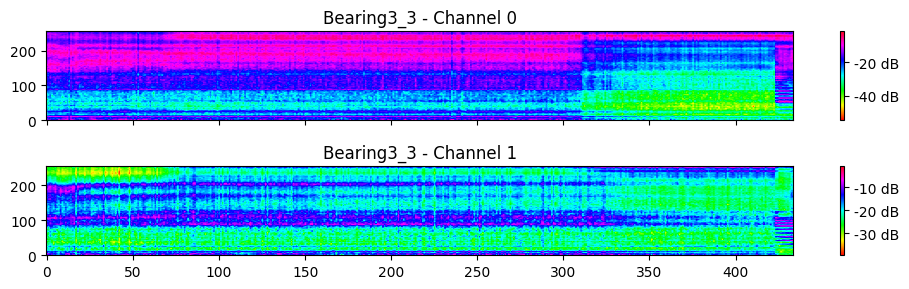

In [30]:
##### Loop through files and plot the mel spectrogram!!! ####
for fname in mel_files:
    file_path = os.path.join(mel_folder, fname)
    mel_spec_db = np.load(file_path)   # shape: (time, n_mels, 2)

    # print(f"{fname}: shape={mel_spec_db.shape}")
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 3), sharex=True)
    
    # Extract each channel as 2D array: (samples, n_melbands)
    channel_0 = mel_spec_db[:, :, 0]
    channel_1 = mel_spec_db[:, :, 1]

    img0 = axs[0].imshow(channel_0.T, aspect='auto', origin='lower', cmap='hsv')
    axs[0].set_title(f'{fname[:10]} - Channel 0')
    fig.colorbar(img0, ax=axs[0], format='%+2.0f dB')

    # Channel 1
    img1 = axs[1].imshow(channel_1.T, aspect='auto', origin='lower', cmap='hsv')
    axs[1].set_title(f'{fname[:10]} - Channel 1')
    fig.colorbar(img1, ax=axs[1], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()    